# Data loading and preprocessing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow import keras 

In [2]:
data = pd.read_csv('covid.csv')

In [3]:
data = data.drop(['id'], axis = 1)

In [4]:
data.columns

Index(['sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'intubed', 'pneumonia', 'age', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
       'covid_res', 'icu'],
      dtype='object')

In [5]:
data.update(data[['sex', 'patient_type','intubed','pneumonia','pregnancy','inmsupr','hypertension','other_disease','cardiovascular','obesity','renal_chronic', 'diabetes', 'copd', 'asthma', 'tobacco', 'contact_other_covid', 'covid_res', 'icu']].replace(2,0).replace([97, 98, 99], 9))

In [6]:
data["icu"].value_counts()

9    444814
0    111676
1     10112
Name: icu, dtype: int64

In [7]:
data = data[data.icu != 9]

In [8]:
for i in data.columns:
    print(data[i].value_counts())

0    72999
1    48789
Name: sex, dtype: int64
0    121788
Name: patient_type, dtype: int64
15-06-2020    2245
22-06-2020    2162
08-06-2020    2131
16-06-2020    2120
10-06-2020    2074
              ... 
01-02-2020       6
01-01-2020       5
11-01-2020       5
03-01-2020       5
02-01-2020       4
Name: entry_date, Length: 181, dtype: int64
01-06-2020    2892
15-06-2020    2361
10-06-2020    2332
25-05-2020    2140
08-06-2020    2127
              ... 
01-01-2020       8
18-02-2020       8
08-01-2020       7
20-02-2020       5
19-02-2020       5
Name: date_symptoms, Length: 181, dtype: int64
9999-99-99    89286
16-06-2020      628
08-06-2020      615
10-06-2020      612
12-06-2020      593
              ...  
30-01-2020        1
25-02-2020        1
08-02-2020        1
15-01-2020        1
14-01-2020        1
Name: date_died, Length: 124, dtype: int64
0    111823
1      9965
Name: intubed, dtype: int64
1    73688
0    48100
Name: pneumonia, dtype: int64
56     2905
52     2780
60     27

In [9]:
data['pregnancy'].value_counts()


9    73165
0    47554
1     1069
Name: pregnancy, dtype: int64

In [10]:
data['contact_other_covid'].value_counts()

9    62090
0    42452
1    17246
Name: contact_other_covid, dtype: int64

In [11]:
data.drop('pregnancy', axis = 1, inplace = True)
data.drop('contact_other_covid', axis = 1, inplace = True)

In [12]:
data = data[['sex', 'patient_type', 'entry_date', 'date_symptoms',
       'date_died', 'intubed', 'pneumonia', 'age', 'diabetes',
       'copd', 'asthma', 'inmsupr', 'hypertension', 'other_disease',
       'cardiovascular', 'obesity', 'renal_chronic', 'tobacco'
        ,'covid_res', 'icu']].replace([9, 3], np.nan).dropna()

In [13]:
data.shape

(105538, 20)

In [14]:
for i in data.columns:
    print(data[i].value_counts())

0    63308
1    42230
Name: sex, dtype: int64
0    105538
Name: patient_type, dtype: int64
15-06-2020    1965
08-06-2020    1909
01-06-2020    1847
10-06-2020    1844
16-06-2020    1828
              ... 
03-01-2020       5
01-01-2020       5
11-01-2020       5
02-01-2020       4
29-06-2020       2
Name: entry_date, Length: 181, dtype: int64
01-06-2020    2631
10-06-2020    2031
25-05-2020    1934
20-05-2020    1872
08-06-2020    1868
              ... 
18-02-2020       8
20-02-2020       5
19-02-2020       5
08-01-2020       5
28-06-2020       1
Name: date_symptoms, Length: 180, dtype: int64
9999-99-99    75348
16-06-2020      594
08-06-2020      563
10-06-2020      562
12-06-2020      550
              ...  
14-01-2020        1
30-01-2020        1
26-02-2020        1
09-02-2020        1
11-02-2020        1
Name: date_died, Length: 122, dtype: int64
0    96778
1     8760
Name: intubed, dtype: int64
1    64785
0    40753
Name: pneumonia, dtype: int64
56.0     2498
52.0     2432
60.0   

In [15]:
data['patient_type'].value_counts()

0    105538
Name: patient_type, dtype: int64

In [16]:
data = data.drop(['entry_date', 'date_symptoms', 'patient_type', 'date_died', 'age'], axis = 1)

In [17]:
data.shape

(105538, 15)

In [18]:
X_icu = data.drop('icu', axis = 1)
y_icu = data['icu']

In [19]:
X_icu.shape

(105538, 14)

In [20]:
y_icu.shape

(105538,)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_icu, y_icu, test_size = 0.2)

In [23]:
X_valid, y_valid = X_test[:2200], y_test[:2200]

In [24]:
X_train.shape

(84430, 14)

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [26]:
adam = keras.optimizers.Adam(learning_rate=0.01)

In [27]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(150, activation = "relu"))
model.add(keras.layers.Dense(75, activation = "relu"))
model.add(keras.layers.Dense(1, activation = "sigmoid"))

In [29]:
model.compile(loss = 'binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [30]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
2639/2639 [==============================] - 18s 6ms/step - loss: 0.2379 - accuracy: 0.9160 - val_loss: 0.2499 - val_accuracy: 0.9232
Epoch 2/30
2639/2639 [==============================] - 13s 5ms/step - loss: 0.2319 - accuracy: 0.9172 - val_loss: 0.2326 - val_accuracy: 0.9232
Epoch 3/30
2639/2639 [==============================] - 13s 5ms/step - loss: 0.2283 - accuracy: 0.9175 - val_loss: 0.2278 - val_accuracy: 0.9232
Epoch 4/30
2639/2639 [==============================] - 14s 5ms/step - loss: 0.2269 - accuracy: 0.9184 - val_loss: 0.2296 - val_accuracy: 0.9232
Epoch 5/30
2639/2639 [==============================] - 14s 5ms/step - loss: 0.2293 - accuracy: 0.9149 - val_loss: 0.2211 - val_accuracy: 0.9200
Epoch 6/30
2639/2639 [==============================] - 14s 5ms/step - loss: 0.2269 - accuracy: 0.9163 - val_loss: 0.2261 - val_accuracy: 0.9232
Epoch 7/30
2639/2639 [==============================] - 14s 5ms/step - loss: 0.2260 - accuracy: 0.9159 - val_loss: 0.2255 - val_ac

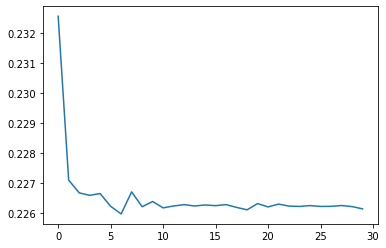

In [31]:
history = pd.DataFrame(model.history.history)
history.loss.plot()

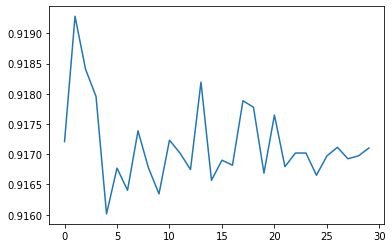

In [32]:
history.accuracy.plot()

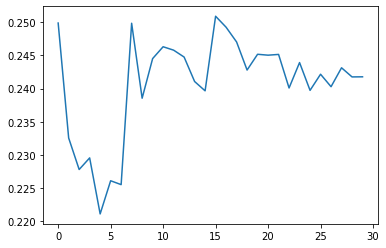

In [33]:
history.val_loss.plot()

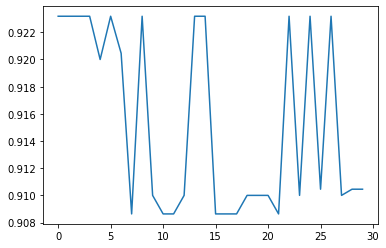

In [34]:
history.val_accuracy.plot()

In [36]:
model.evaluate(X_test, y_test)

660/660 [==============================] - 3s 5ms/step - loss: 0.2265 - accuracy: 0.9162


[0.22648970782756805, 0.9162402749061584]